In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

In [2]:
#Import CSV File for 30 year mortgage rates 2019-2023
rates = pd.read_csv('mortgagerates.csv')
#listing counts for Multnomah county
m_county = pd.read_csv('multnomah.csv')
#listing counts for Clackamas County
c_county = pd.read_csv('clackamas.csv')
#Listing counts for Washington County
w_county = pd.read_csv('washington.csv')
# Median Home Values and income
house = pd.read_csv('cleaned_home_values.csv')

In [3]:
rates

#convert the date
rates['observation_date'] = pd.to_datetime(rates['observation_date'])

#extract Year and create a new column
rates['Year'] = rates['observation_date'].dt.year


#group by Year and calculate the mean
mean_rate = rates.groupby('Year')['MORTGAGE30US'].mean().round(0)
mean_rate

mean_rate

Year
2019    4.0
2020    3.0
2021    3.0
2022    5.0
2023    7.0
Name: MORTGAGE30US, dtype: float64

In [4]:
rate_df = mean_rate.reset_index()
rate_df.columns = ['Year', 'Average Rate']
rate_df

,Year,Average Rate
0,2019,4.0
1,2020,3.0
2,2021,3.0
3,2022,5.0
4,2023,7.0


In [5]:
#Create Multnomah County DF
#convert the date
m_county['observation_date'] = pd.to_datetime(m_county['observation_date'])

#extract Year and create a new column
m_county['Year'] = m_county['observation_date'].dt.year

#group by Year and calculate the mean
m_house_count = m_county.groupby('Year')['NEWLISCOU41051_20250107'].sum().round(0)

mult_df = m_house_count.reset_index()
mult_df.columns = ['Year', 'Multnomah County: Avg Monthly Listing']
mult_df


,Year,Multnomah County: Avg Monthly Listing
0,2019,14984
1,2020,13512
2,2021,15228
3,2022,13540
4,2023,10398


In [6]:
c_county.head()

,observation_date,ACTLISCOU41005_20250107,ACTLISCOU41005_20250130
0,2019-01-01,1118,1120
1,2019-02-01,1127,1129
2,2019-03-01,1191,1191
3,2019-04-01,1304,1304
4,2019-05-01,1387,1389


In [7]:
#create Clackamas County DF
#convert the date
c_county['observation_date'] = pd.to_datetime(m_county['observation_date'])

#extract Year and create a new column
c_county['Year'] = c_county['observation_date'].dt.year

#group by Year and calculate the mean
c_house_count = c_county.groupby('Year')['ACTLISCOU41005_20250107'].sum().round(0)

clack_df = m_house_count.reset_index()
clack_df.columns = ['Year', 'Clackamas County: Avg Monthly Listing']
clack_df

,Year,Clackamas County: Avg Monthly Listing
0,2019,14984
1,2020,13512
2,2021,15228
3,2022,13540
4,2023,10398


In [8]:
w_county.head()

,observation_date,TOTLISCOU41067_20250107,TOTLISCOU41067_20250130
0,2019-01-01,1053,1049
1,2019-02-01,1012,1009
2,2019-03-01,1074,1073
3,2019-04-01,1208,1208
4,2019-05-01,1325,1324


In [9]:
#create Washington County DF
#convert the date
w_county['observation_date'] = pd.to_datetime(m_county['observation_date'])

#extract Year and create a new column
w_county['Year'] = w_county['observation_date'].dt.year

#group by Year and calculate the mean
w_house_count = w_county.groupby('Year')['TOTLISCOU41067_20250107'].sum().round(0)

wash_df = w_house_count.reset_index()
wash_df.columns = ['Year', 'Washington County: Avg Monthly Listing']
wash_df

,Year,Washington County: Avg Monthly Listing
0,2019,18173
1,2020,26155
2,2021,20742
3,2022,20230
4,2023,19575


In [10]:
merge1 = pd.merge(wash_df,clack_df, on='Year')
merge2 = pd.merge(merge1,mult_df, on='Year')
merge3 = pd.merge(merge2, rate_df, on='Year')
merge3

,Year,Washington County: Avg Monthly Listing,Clackamas County: Avg Monthly Listing,Multnomah County: Avg Monthly Listing,Average Rate
0,2019,18173,14984,14984,4.0
1,2020,26155,13512,13512,3.0
2,2021,20742,15228,15228,3.0
3,2022,20230,13540,13540,5.0
4,2023,19575,10398,10398,7.0


In [11]:
house.head()

,County,Median Household Income,Median Home Value,Median Gross Rent,Year,Price-to-Income Ratio,Rent-to-Income Ratio
0,"Washington County, Oregon",82215,386600,1359,2019,4.702305,19.835796
1,"Clackamas County, Oregon",80484,395100,1295,2019,4.909050,19.308185
2,"Multnomah County, Oregon",69176,386200,1237,2019,5.582861,21.458309
3,"Clackamas County, Oregon",82911,421100,1356,2020,5.078940,19.625864
4,"Multnomah County, Oregon",71425,410800,1309,2020,5.751488,21.992300


In [12]:
house
wash_df = house[house['County']=='Washington County, Oregon']
clack_df = house[house['County']=='Clackamas County, Oregon']
mult_df = house[house['County']=='Multnomah County, Oregon']

mult_df = mult_df.reset_index()
mult_df = mult_df[['Year','Median Home Value']]
mult_df.columns = ['Year', 'Multnomah County: Median Home Values']
mult_df

,Year,Multnomah County: Median Home Values
0,2019,386200
1,2020,410800
2,2021,437600
3,2022,492100
4,2023,528000


In [13]:
clack_df = clack_df.reset_index()
clack_df = clack_df[['Year','Median Home Value']]
clack_df.columns = ['Year', 'Clackamas County: Median Home Values']
clack_df 

,Year,Clackamas County: Median Home Values
0,2019,395100
1,2020,421100
2,2021,452200
3,2022,532200
4,2023,577900


In [14]:
wash_df = wash_df.reset_index()
wash_df = wash_df[['Year','Median Home Value']]
wash_df.columns = ['Year', 'Washington County: Median Home Values']
wash_df

,Year,Washington County: Median Home Values
0,2019,386600
1,2020,413500
2,2021,439300
3,2022,504300
4,2023,558500


In [15]:
merge4 = pd.merge(merge3, wash_df, on='Year')
merge5 = pd.merge(merge4, clack_df, on='Year')
merged_df = pd.merge(merge5, mult_df, on='Year')
merged_df

,Year,Washington County: Avg Monthly Listing,Clackamas County: Avg Monthly Listing,Multnomah County: Avg Monthly Listing,Average Rate,Washington County: Median Home Values,Clackamas County: Median Home Values,Multnomah County: Median Home Values
0,2019,18173,14984,14984,4.0,386600,395100,386200
1,2020,26155,13512,13512,3.0,413500,421100,410800
2,2021,20742,15228,15228,3.0,439300,452200,437600
3,2022,20230,13540,13540,5.0,504300,532200,492100
4,2023,19575,10398,10398,7.0,558500,577900,528000


In [16]:
#export CSV
merged_df.to_csv('calc.csv', index=False)

# Plots and Calculations

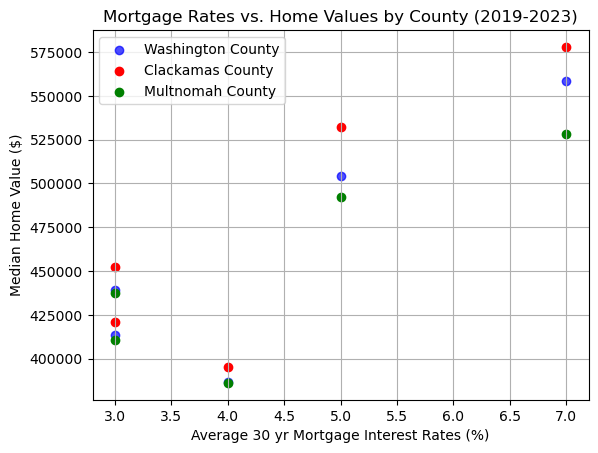

In [17]:
#Scatter Plot for Mortgage Rates vs Home Values
#Define x axis(Mortgage Rates) and y axis (Home Prices)
rates = merged_df['Average Rate']
w_homes = merged_df['Washington County: Median Home Values']
c_homes = merged_df['Clackamas County: Median Home Values']
m_homes = merged_df['Multnomah County: Median Home Values']

plt.scatter(rates, w_homes, color='blue', alpha=0.7, label='Washington County')
plt.scatter(rates, c_homes, color='red', label='Clackamas County')
plt.scatter(rates, m_homes, color='green', label='Multnomah County')

plt.xlabel("Average 30 yr Mortgage Interest Rates (%)")
plt.ylabel("Median Home Value ($)")
plt.title("Mortgage Rates vs. Home Values by County (2019-2023)")
plt.legend()
plt.grid(True)
plt.show()

# Pearson Correlation and Linear Regression for Mortgage Rates Vs Home Values

The R² value for Washington County is: 0.7497
The correlation between Home Values and Morgate Rates (%) is 0.87


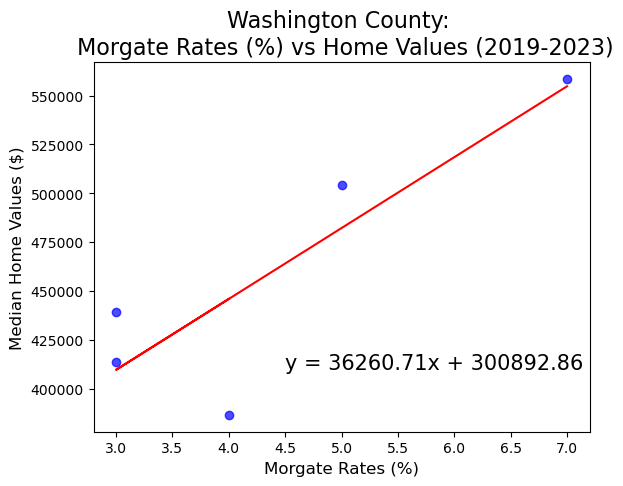

The R² value for Clackamas County is: 0.7344
The correlation between Home Values and Morgate Rates (%) is 0.86


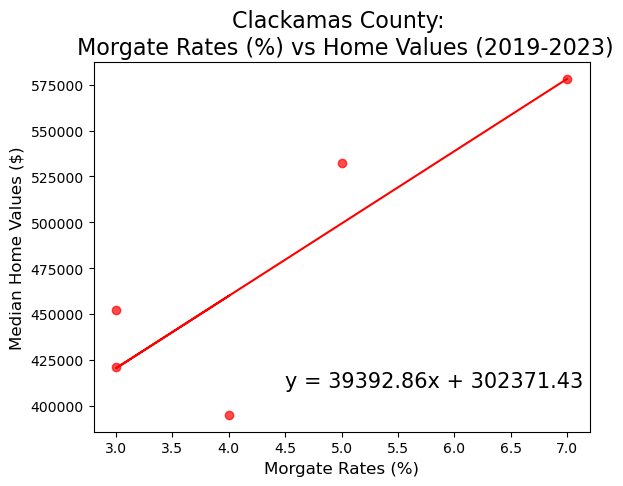

The R² value for Multnomah County is: 0.6963
The correlation between Home Values and Morgate Rates (%) is 0.83


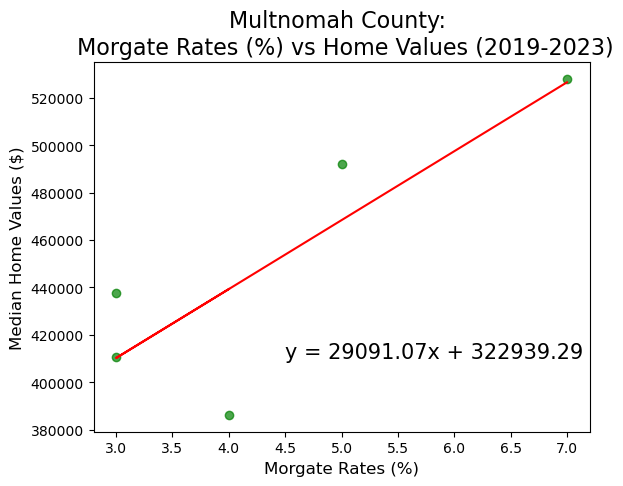

In [18]:
# Function for Linear Regression Plot
def plot_linear_regression(x_values, y_values, coordinates, label, color, xlabel): 
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

    # Plot scatter and regression line
    plt.scatter(x_values, y_values, label=label, alpha=0.7, color=color)
    plt.plot(x_values, regress_values, "r-")

    # Annotate with regression equation
    plt.annotate(line_eq, coordinates, fontsize=15, color='black')

    # Calculate Correlation
    correlation = st.pearsonr(x_values,y_values)

    # Labels and Title
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel("Median Home Values ($)", fontsize=12)
    plt.title(f"{label}: \n {xlabel} vs Home Values (2019-2023)", fontsize=16)
    # plt.grid(True)

    #Print Results
    print(f"The R² value for {label} is: {rvalue**2:.4f}")
    print(f"The correlation between Home Values and {xlabel} is {round(correlation[0],2)}")
    plt.show()

# Defined x and y variables
x_values = merged_df['Average Rate']
w_homes = merged_df['Washington County: Median Home Values']
c_homes = merged_df['Clackamas County: Median Home Values']
m_homes = merged_df['Multnomah County: Median Home Values']

# Plot regression for each county
plot_linear_regression(x_values, w_homes, (4.5, 410000), "Washington County", "blue", "Morgate Rates (%)")
plot_linear_regression(x_values, c_homes, (4.5, 410000), "Clackamas County", "red", "Morgate Rates (%)")
plot_linear_regression(x_values, m_homes, (4.5, 410000), "Multnomah County", "green", "Morgate Rates (%)")


# All 3 counties on one plot - Rates vs Home Values

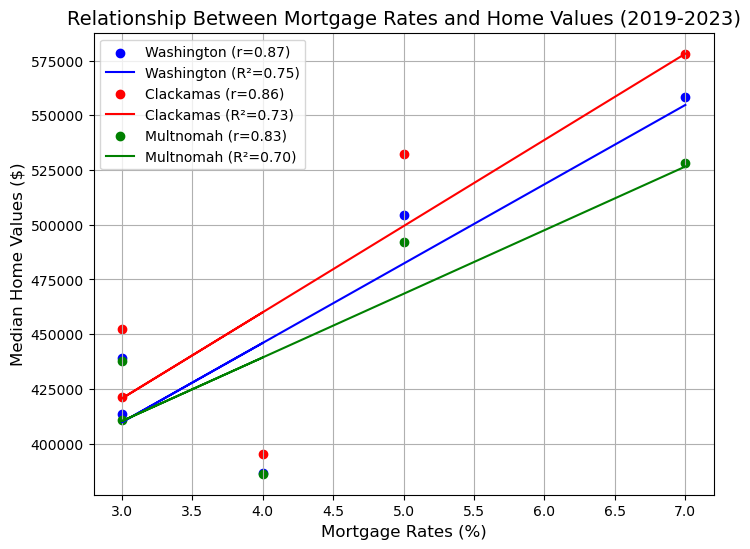

Washington County: R²=0.7497, Pearson Correlation=0.8659
Clackamas County: R²=0.7344, Pearson Correlation=0.8570
Multnomah County: R²=0.6963, Pearson Correlation=0.8344


In [31]:
# Function for Combined Linear Regression Plot
def plot_combined_regression(x_values, y_wash, y_clack, y_mult, xlabel):
    plt.figure(figsize=(8, 6))

    # Linear regression & Pearson correlation for Washington County
    slope_w, intercept_w, rvalue_w, pvalue_w, stderr_w = st.linregress(x_values, y_wash)
    correlation_w, _ = st.pearsonr(x_values, y_wash)
    regress_values_w = x_values * slope_w + intercept_w
    plt.scatter(x_values, y_wash, label=f"Washington (r={correlation_w:.2f})", color="blue")
    plt.plot(x_values, regress_values_w, "b-", label=f"Washington (R²={rvalue_w**2:.2f})")

    # Linear regression & Pearson correlation for Clackamas County
    slope_c, intercept_c, rvalue_c, pvalue_c, stderr_c = st.linregress(x_values, y_clack)
    correlation_c, _ = st.pearsonr(x_values, y_clack)
    regress_values_c = x_values * slope_c + intercept_c
    plt.scatter(x_values, y_clack, label=f"Clackamas (r={correlation_c:.2f})", color="red")
    plt.plot(x_values, regress_values_c, "r-", label=f"Clackamas (R²={rvalue_c**2:.2f})")

    # Linear regression & Pearson correlation for Multnomah County
    slope_m, intercept_m, rvalue_m, pvalue_m, stderr_m = st.linregress(x_values, y_mult)
    correlation_m, _ = st.pearsonr(x_values, y_mult)
    regress_values_m = x_values * slope_m + intercept_m
    plt.scatter(x_values, y_mult, label=f"Multnomah (r={correlation_m:.2f})", color="green")
    plt.plot(x_values, regress_values_m, "g-", label=f"Multnomah (R²={rvalue_m**2:.2f})")

    # Labels, Title, and Legend
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel("Median Home Values ($)", fontsize=12)
    plt.title(f"Relationship Between Mortgage Rates and Home Values (2019-2023)", fontsize=14)
    plt.legend()
    plt.grid(True)

    plt.show()

    # Print Pearson Correlation & R² Values
    print(f"Washington County: R²={rvalue_w**2:.4f}, Pearson Correlation={correlation_w:.4f}")
    print(f"Clackamas County: R²={rvalue_c**2:.4f}, Pearson Correlation={correlation_c:.4f}")
    print(f"Multnomah County: R²={rvalue_m**2:.4f}, Pearson Correlation={correlation_m:.4f}")

# Define x and y variables
x_values = merged_df['Average Rate']  # X-axis variable (Mortgage Rates)
w_homes = merged_df['Washington County: Median Home Values']
c_homes = merged_df['Clackamas County: Median Home Values']
m_homes = merged_df['Multnomah County: Median Home Values']

# Plot all counties on one graph
plot_combined_regression(x_values, w_homes, c_homes, m_homes, "Mortgage Rates (%)")


# Comparing Housing Availability and Home Prices


The R² value for Washington County is: 0.0554
The correlation between Home Values and Annual Housing Inventory is -0.24


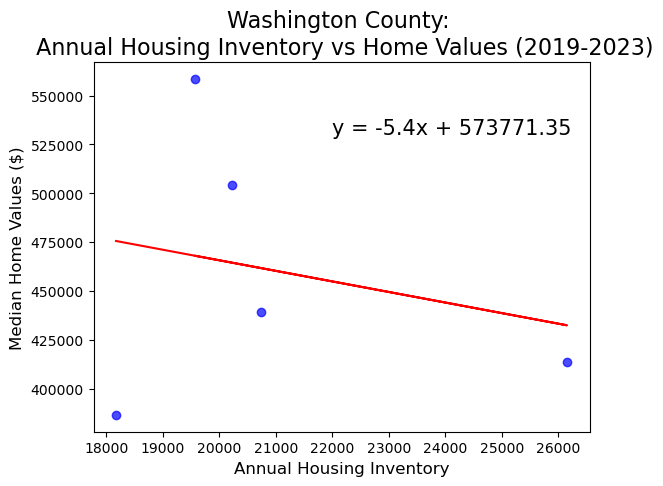

The R² value for Clackamas County is: 0.6456
The correlation between Home Values and Annual Housing Inventory is -0.8


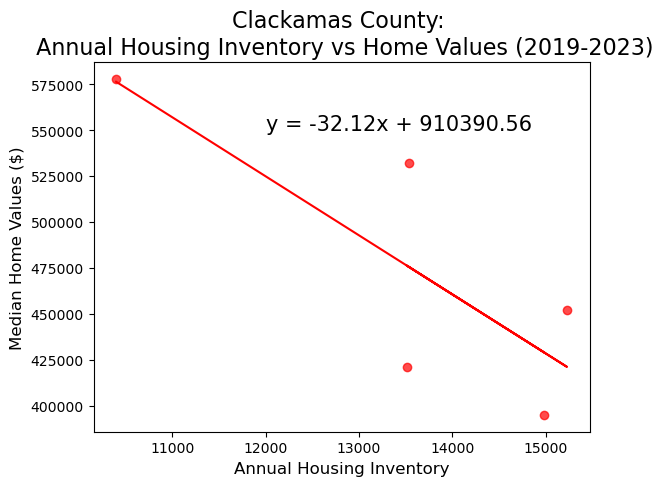

The R² value for Multnomah County is: 0.6323
The correlation between Home Values and Annual Housing Inventory is -0.8


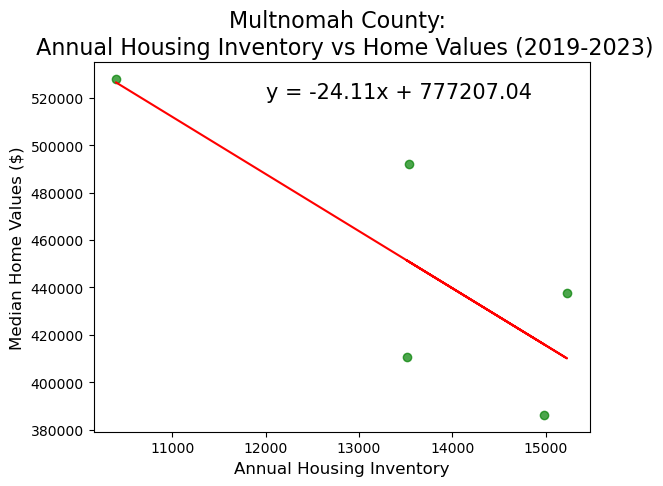

In [28]:

# Y variables
w_homes = merged_df['Washington County: Median Home Values']
c_homes = merged_df['Clackamas County: Median Home Values']
m_homes = merged_df['Multnomah County: Median Home Values']

# X variables
w_listing = merged_df['Washington County: Avg Monthly Listing']
c_listing = merged_df['Clackamas County: Avg Monthly Listing']
m_listing = merged_df['Multnomah County: Avg Monthly Listing']

# Plot regression for each county
plot_linear_regression(w_house_count, w_homes, (22000, 530000), "Washington County", "blue", "Annual Housing Inventory")
plot_linear_regression(c_house_count, c_homes, (12000, 550000), "Clackamas County", "red", "Annual Housing Inventory")
plot_linear_regression(m_house_count, m_homes, (12000, 520000), "Multnomah County", "green", "Annual Housing Inventory")



# Plotting All 3 counties on one graph

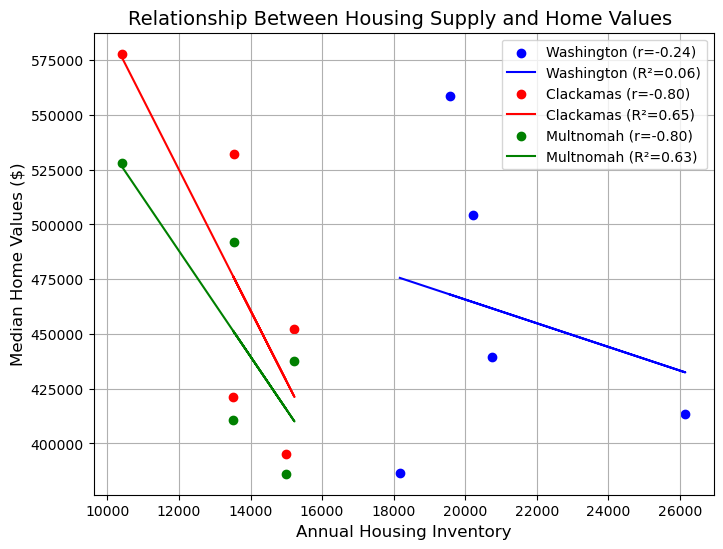

Washington County: R²=0.0554, Pearson Correlation=-0.2353
Clackamas County: R²=0.6456, Pearson Correlation=-0.8035
Multnomah County: R²=0.6323, Pearson Correlation=-0.7952


In [29]:
# Function for Combined Linear Regression Plot with Pearson Correlation
def plot_combined_regression(x_wash, x_clack, x_mult, y_wash, y_clack, y_mult, xlabel):
    plt.figure(figsize=(8, 6))

    # Perform linear regression & Pearson correlation for Washington County
    slope_w, intercept_w, rvalue_w, pvalue_w, stderr_w = st.linregress(x_wash, y_wash)
    correlation_w, _ = st.pearsonr(x_wash, y_wash)
    regress_values_w = x_wash * slope_w + intercept_w
    plt.scatter(x_wash, y_wash, label=f"Washington (r={correlation_w:.2f})", color="blue")
    plt.plot(x_wash, regress_values_w, "b-", label=f"Washington (R²={rvalue_w**2:.2f})")

    # Perform linear regression & Pearson correlation for Clackamas County
    slope_c, intercept_c, rvalue_c, pvalue_c, stderr_c = st.linregress(x_clack, y_clack)
    correlation_c, _ = st.pearsonr(x_clack, y_clack)
    regress_values_c = x_clack * slope_c + intercept_c
    plt.scatter(x_clack, y_clack, label=f"Clackamas (r={correlation_c:.2f})", color="red")
    plt.plot(x_clack, regress_values_c, "r-", label=f"Clackamas (R²={rvalue_c**2:.2f})")

    # Perform linear regression & Pearson correlation for Multnomah County
    slope_m, intercept_m, rvalue_m, pvalue_m, stderr_m = st.linregress(x_mult, y_mult)
    correlation_m, _ = st.pearsonr(x_mult, y_mult)
    regress_values_m = x_mult * slope_m + intercept_m
    plt.scatter(x_mult, y_mult, label=f"Multnomah (r={correlation_m:.2f})", color="green")
    plt.plot(x_mult, regress_values_m, "g-", label=f"Multnomah (R²={rvalue_m**2:.2f})")

    # Labels, Title, and Legend
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel("Median Home Values ($)", fontsize=12)
    plt.title(f"Relationship Between Housing Supply and Home Values ", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print Pearson Correlation & R² Values
    print(f"Washington County: R²={rvalue_w**2:.4f}, Pearson Correlation={correlation_w:.4f}")
    print(f"Clackamas County: R²={rvalue_c**2:.4f}, Pearson Correlation={correlation_c:.4f}")
    print(f"Multnomah County: R²={rvalue_m**2:.4f}, Pearson Correlation={correlation_m:.4f}")

# Define x and y variables
w_homes = merged_df['Washington County: Median Home Values']
c_homes = merged_df['Clackamas County: Median Home Values']
m_homes = merged_df['Multnomah County: Median Home Values']

# X-axis variables (Houses for Sale)
w_house_count = merged_df['Washington County: Avg Monthly Listing']
c_house_count = merged_df['Clackamas County: Avg Monthly Listing']
m_house_count = merged_df['Multnomah County: Avg Monthly Listing']

# Plot all counties on one graph with Pearson correlation
plot_combined_regression(w_house_count, c_house_count, m_house_count, w_homes, c_homes, m_homes, "Annual Housing Inventory")
